In [14]:
# install.packages("ggplot2")#第一次运行的时候要安装，接下来就可以屏蔽
library(ggplot2)#用来绘制R图片的利器，学R语言必要会，甚至你可以学习，python,用R语言的ggplot2来绘图（当然python也支持ggplot2了，python还有seaborn）
# install.packages("ggpubr")#第一次运行的时候要安装，接下来就可以屏蔽
library(ggpubr)#如果觉得ggplot2太高端，很难学会，那建议学ggpubr,这是一个专门用来绘制符合期刊出版社满意的图片

Loading required package: magrittr


In [9]:
df = read.csv(file = 'classifiers comparison2.csv', sep = ',')#读取csv文件，当然也有一个类似的方法读取table,read.table()
head(df)#用来显示一小部分数据

Dataset,Method,Acc,Sn,Sp,MCC,ROC
Dataset-S51,GBDT,0.7234,0.7200,0.7269,0.4468,0.7234
Dataset-S51,KNN,0.6167,0.7337,0.4996,0.2400,0.6167
Dataset-S51,LR,0.7192,0.6924,0.7460,0.4390,0.7192
Dataset-S51,NB,0.7050,0.7100,0.7001,0.4101,0.7050
Dataset-S51,RF,0.7165,0.7192,0.7138,0.4331,0.7165
Dataset-S51,SVM,0.7257,0.7169,0.7345,0.4515,0.7257


In [11]:
fig_acc <- df[1:3]#提取前三列数据
head(fig_acc)#用来显示一小部分数据

Dataset,Method,Acc
Dataset-S51,GBDT,0.7234
Dataset-S51,KNN,0.6167
Dataset-S51,LR,0.7192
Dataset-S51,NB,0.7050
Dataset-S51,RF,0.7165
Dataset-S51,SVM,0.7257


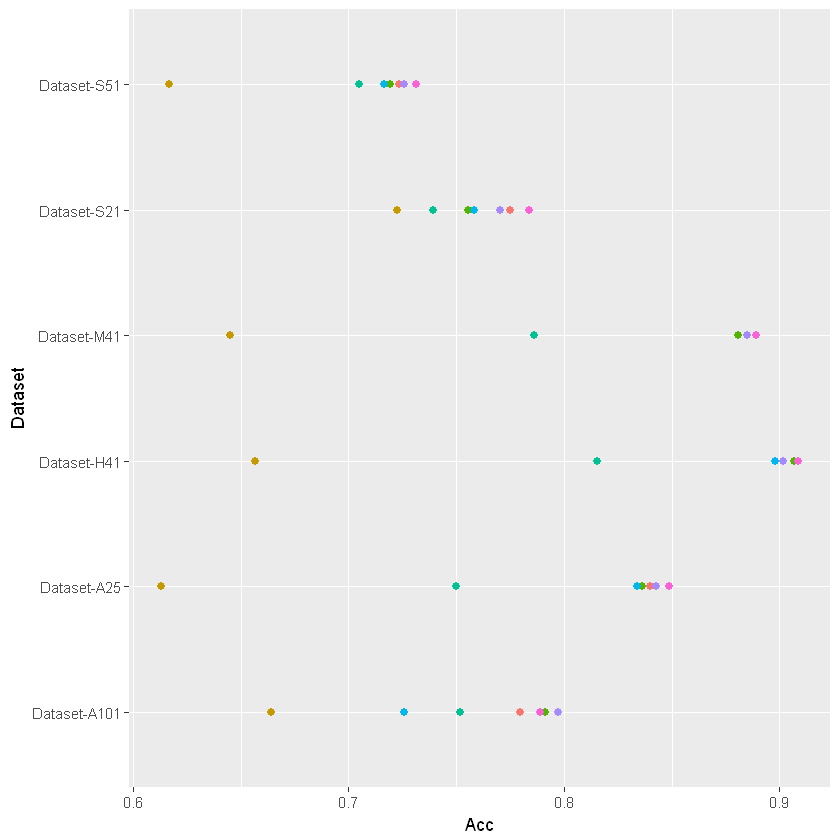

In [15]:
p1 <- ggplot(fig_acc, aes(x = Acc, y = Dataset, color = Method)) + 
geom_point(size = 2) + theme(legend.position = "none")# 绘制散点图，theme用来设置尺寸，字体大小，位置等属性，geom_point代表绘制散点图，
p1

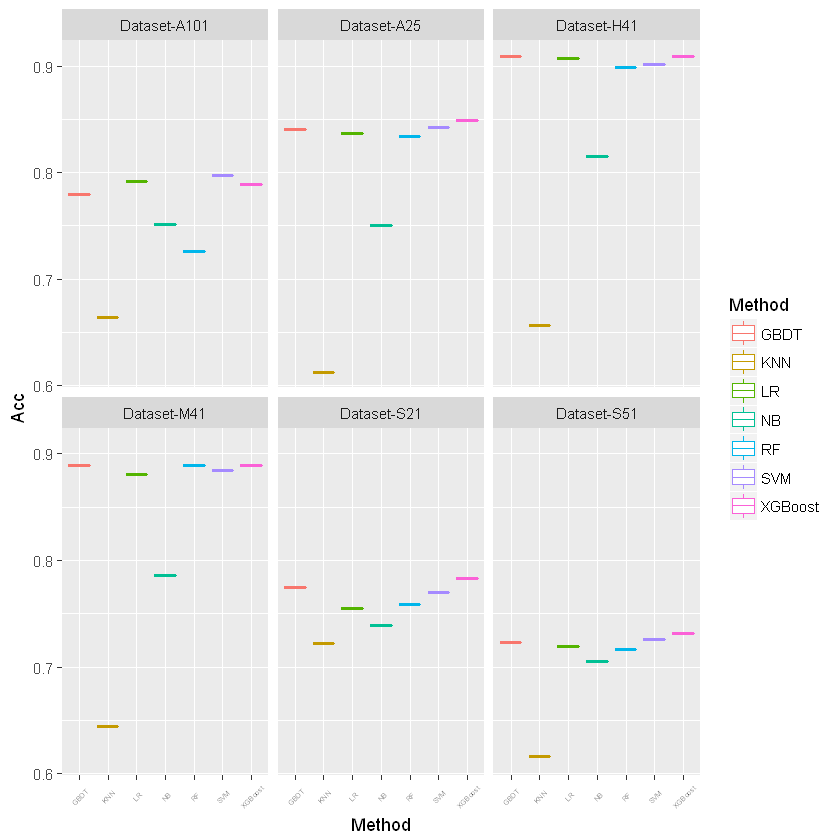

In [16]:
p2 <- ggplot(fig_acc, aes(Method, Acc, colour = Method)) + 
geom_boxplot() + 
facet_wrap(~ Dataset, ncol = 3) + theme(axis.text.x = element_text(angle = 45 , hjust = 0.5, vjust = 0.5,size = 4))
#geom_boxplot代表绘制箱型图。facet_wrap()用来分子图显示，很明显，ncol=3代表三列
p2

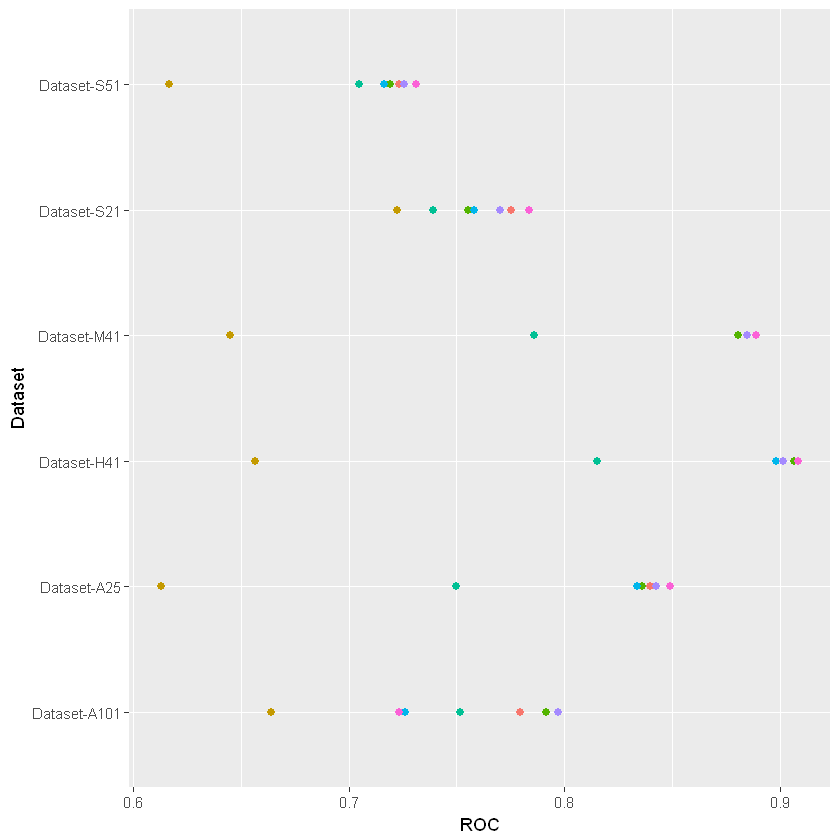

In [17]:
p3 <- ggplot(df, aes(x = ROC, y = Dataset, color = Method)) + 
geom_point(size = 2) + 
theme(legend.position = "none")
p3

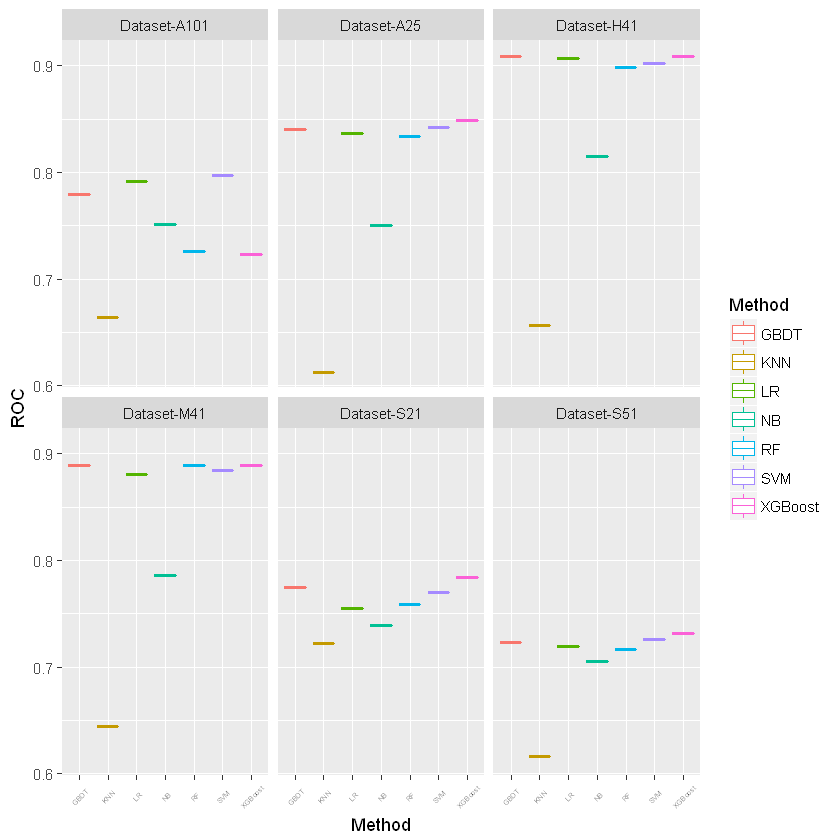

In [18]:

p4 <- ggplot(df, aes(Method, ROC, colour = Method)) + 
theme(axis.text.x = element_text(angle = 45 , hjust = 0.5, vjust = 0.5,size = 4))+ 
geom_boxplot() + 
facet_wrap(~ Dataset, ncol = 3) 
p4

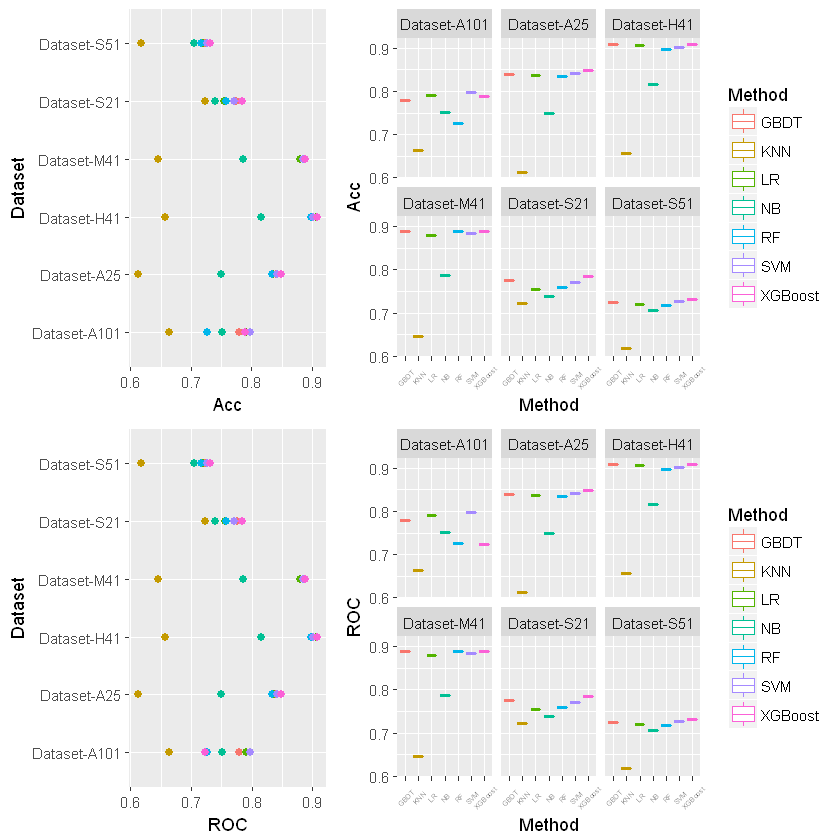

In [33]:

p <- ggarrange(p1,p2,p3,p4,widths = c(2,3))#将图片融合，其中c(2,3)代表第一列跟第二列宽度的比值
p

In [38]:
#保存成配电房
pdf(file = "cc2.pdf" )
plot(p)
dev.off()

png 
  2

In [39]:
#保存成tiff,同时设置宽高，dpi等属性，lzw压缩
tiff(filename = "cc2.tiff",width = 1200,height = 1200,units = "px",compression = "lzw",res = 300)
plot(p)
dev.off()

png 
  2

In [40]:
#保存成svg格式的矢量图，方便用visio转换，可以转换成emf格式插入word，若是苹果电脑，可以pdf插入Word
svg("cc2.svg")
plot(p)
dev.off()

png 
  2